In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
 

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [13]:
class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

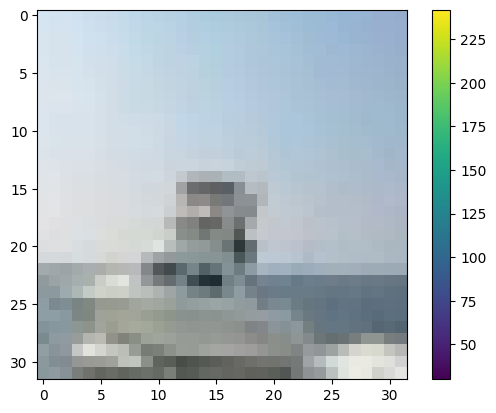

In [14]:
plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)

In [15]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
y_train = y_train.flatten()
y_test = y_test.flatten()

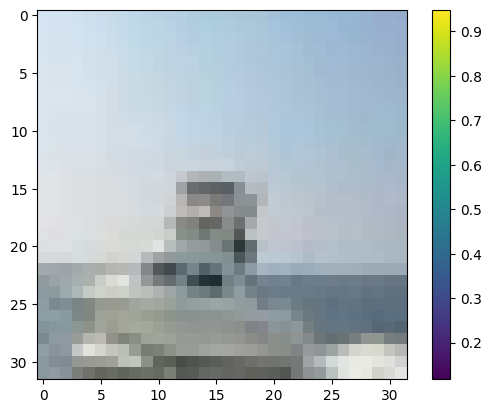

In [16]:
plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)

In [17]:
model = keras.Sequential(
[
layers.Input(shape=(32, 32, 3)),
layers.Conv2D(32, 3, activation="relu"),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Conv2D(64, 3, activation="relu"),
layers.MaxPooling2D(pool_size=(2, 2)),
layers.Conv2D(128, 3, activation="relu"),
layers.Flatten(),
layers.Dense(64, activation="relu"),
layers.Dense(10),
]
)

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

In [19]:
model.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer=tf.keras.optimizers.Nadam(use_ema=True),
metrics=["accuracy"],
)

In [21]:
model.fit(x_train, y_train, epochs=20, batch_size = 128, verbose =2)

Epoch 1/20
391/391 - 101s - loss: 0.3610 - accuracy: 0.8735 - 101s/epoch - 260ms/step
Epoch 2/20
391/391 - 95s - loss: 0.3343 - accuracy: 0.8819 - 95s/epoch - 242ms/step
Epoch 3/20
391/391 - 92s - loss: 0.3030 - accuracy: 0.8937 - 92s/epoch - 234ms/step
Epoch 4/20
391/391 - 90s - loss: 0.2757 - accuracy: 0.9040 - 90s/epoch - 229ms/step
Epoch 5/20
391/391 - 86s - loss: 0.2487 - accuracy: 0.9123 - 86s/epoch - 219ms/step
Epoch 6/20
391/391 - 82s - loss: 0.2265 - accuracy: 0.9209 - 82s/epoch - 210ms/step
Epoch 7/20
391/391 - 94s - loss: 0.2003 - accuracy: 0.9292 - 94s/epoch - 241ms/step
Epoch 8/20
391/391 - 109s - loss: 0.1753 - accuracy: 0.9388 - 109s/epoch - 279ms/step
Epoch 9/20
391/391 - 139s - loss: 0.1623 - accuracy: 0.9439 - 139s/epoch - 355ms/step
Epoch 10/20
391/391 - 122s - loss: 0.1473 - accuracy: 0.9477 - 122s/epoch - 312ms/step
Epoch 11/20
391/391 - 141s - loss: 0.1308 - accuracy: 0.9542 - 141s/epoch - 361ms/step
Epoch 12/20
391/391 - 137s - loss: 0.1210 - accuracy: 0.9579 - 1

9

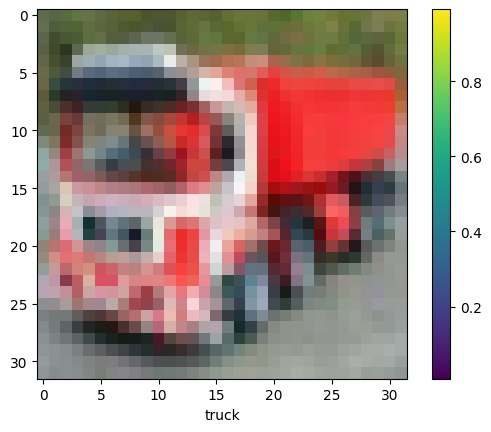

In [26]:
img = 666

predictions[img]

np.argmax(predictions[img])
y_test[img]

plt.figure()
plt.imshow(x_test[img])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_test[img]])

y_test[img]
